# ML Assignment-2

In [19]:
from warnings import filterwarnings 
filterwarnings('ignore')

# Imported libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Data preprocessing

In [21]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [23]:
df.shape

(200000, 9)

In [24]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [26]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [27]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [28]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [31]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)

In [32]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [33]:
df.duplicated().sum()

0

# Drop Unnecessary Columns

In [36]:
uber_data = df.drop(['Unnamed: 0', 'key'], axis=1)
uber_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Converting ‘pickup_datetime’ to datetime format

In [37]:
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])
uber_data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

# Feature Extraction

In [38]:
 uber_data['hour'] = uber_data['pickup_datetime'].dt.hour
uber_data['day'] = uber_data['pickup_datetime'].dt.day
uber_data['month'] = uber_data['pickup_datetime'].dt.month
uber_data['year'] = uber_data['pickup_datetime'].dt.year

In [39]:
uber_data = uber_data.drop('pickup_datetime', axis=1)
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014


# Split features and target variable

In [41]:
X = uber_data.drop('fare_amount', axis=1)
y = uber_data['fare_amount']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [44]:
X_train.shape

(160000, 9)

In [45]:
X_test.shape

(40000, 9)

In [47]:
y_train.shape

(160000,)

In [48]:
y_test.shape

(40000,)

# Visualizing realtionships between Features

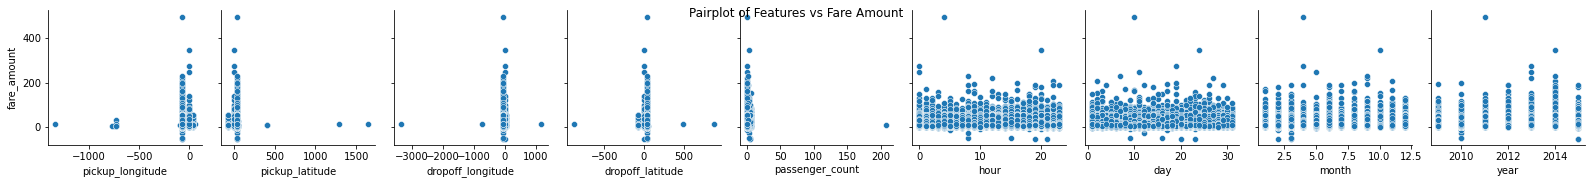

In [49]:
sns.pairplot(uber_data, x_vars=X.columns, y_vars='fare_amount', kind='scatter',diag_kind='kde')
plt.suptitle('Pairplot of Features vs Fare Amount')
plt.show()

# Correlation heatmap

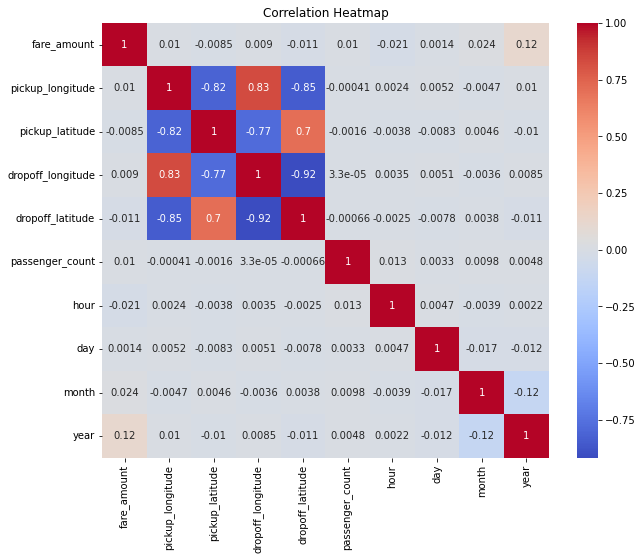

In [50]:
corr_matrix = uber_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for pickup location

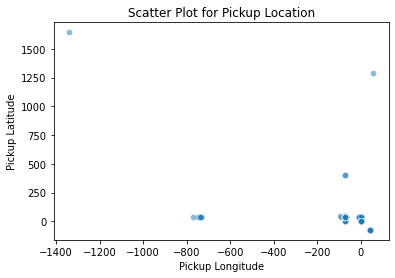

In [52]:
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=uber_data,alpha=0.5)
plt.title('Scatter Plot for Pickup Location')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

# Histogram of fare_amount

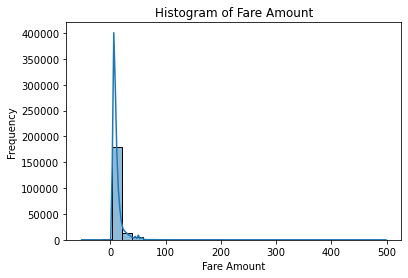

In [53]:
sns.histplot(data=uber_data, x='fare_amount', bins=30, kde=True)
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot of fare_amount by passenger_count

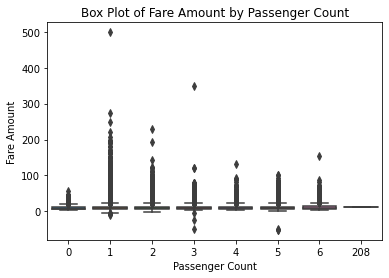

In [54]:
sns.boxplot(x='passenger_count', y='fare_amount', data=uber_data)
plt.title('Box Plot of Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

# Scatter plot of fare_amount vs distance

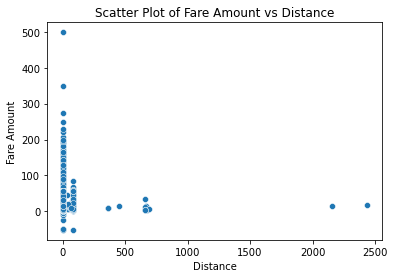

In [55]:
 uber_data['distance'] = np.sqrt((uber_data['pickup_longitude'] -uber_data['dropoff_longitude'])**2 +
(uber_data['pickup_latitude'] -uber_data['dropoff_latitude'])**2)
sns.scatterplot(x='distance', y='fare_amount', data=uber_data)
plt.title('Scatter Plot of Fare Amount vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

# Outliers Detection and removal

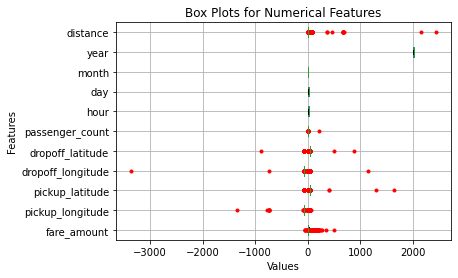

In [56]:
 uber_data.boxplot(sym='r.', vert=False)
plt.title('Box Plots for Numerical Features')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [58]:
Q1 = uber_data.quantile(0.25)
Q3 = uber_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((uber_data < lower_bound) | (uber_data > upper_bound)).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")
uber_data[outliers]

Number of outliers detected: 50144


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,distance
4,16.00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,0.051031
6,24.50,-73.961447,40.693965,-73.871195,40.774297,5,7,12,10,2014,0.120825
7,2.50,0.000000,0.000000,0.000000,0.000000,1,13,11,12,2012,0.000000
11,8.50,0.000000,0.000000,0.000000,0.000000,1,22,23,5,2011,0.000000
12,3.30,-73.966378,40.804440,-73.965890,40.807133,5,14,17,5,2011,0.002737
...,...,...,...,...,...,...,...,...,...,...,...
199976,49.70,-73.978225,40.783318,-73.700963,40.705852,1,23,18,10,2011,0.287881
199977,43.50,-73.996671,40.737483,-73.867758,40.897563,1,21,20,11,2012,0.205534
199982,57.33,-73.969204,40.754771,-73.790351,40.643802,1,11,6,8,2014,0.210482
199985,24.00,-74.005089,40.737301,-73.945290,40.774162,5,15,18,4,2015,0.070247


# Initialize models

In [59]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

# Train models

In [60]:
 linear_model.fit(X_train, y_train)

LinearRegression()

In [65]:
lasso_model.fit(X_train, y_train)

Lasso()

In [64]:
ridge_model.fit(X_train, y_train)

Ridge()

# Make predictions

In [66]:
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

In [67]:
linear_pred

array([13.06342155, 12.2301654 , 10.28270261, ..., 12.91030559,
       11.12846864, 12.97929046])

In [68]:
ridge_pred

array([13.06340892, 12.23015741, 10.28270998, ..., 12.91029555,
       11.12846953, 12.97927986])

In [69]:
lasso_pred

array([11.53602338, 11.37262727, 11.20923115, ..., 11.53602338,
       11.29092921, 11.53602338])

# Evaluate models

In [73]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{model_name} - R2: {r2:.4f}, RMSE: {rmse:.2f}")

In [74]:
evaluate_model(y_test, linear_pred, "Linear Regression")
evaluate_model(y_test, ridge_pred, "Ridge Regression")
evaluate_model(y_test, lasso_pred, "Lasso Regression")

Linear Regression - R2: 0.0161, RMSE: 10.23
Ridge Regression - R2: 0.0161, RMSE: 10.23
Lasso Regression - R2: 0.0033, RMSE: 10.29
